In [27]:
import pandas as pd
import sklearn
from sklearn.feature_selection import VarianceThreshold

from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import Perceptron
from sklearn.metrics import RocCurveDisplay

import matplotlib.pyplot as plt



def var_thres(data, threshold=0.5):
    sel = VarianceThreshold(threshold)
    sel.fit(data)
    return data[data.columns[sel.get_support(indices=True)]]

data = pd.read_csv('cleaned_tolden_data_col_fixed.csv', index_col = 0)
label_col = 'hasAD'

y = data[label_col]
X = data.drop(label_col,axis = 1)
X = 1000000*(X.T/X.sum(axis = 1)).T

X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2, random_state=666)

#filter out low-variance genes
high_var_X_train = var_thres(X_train, 0.8)
high_var_X_test = X_test[high_var_X_train.columns]

#renormalize
high_var_X_train = 1000000*(high_var_X_train.T/high_var_X_train.sum(axis = 1)).T
high_var_X_test = 1000000*(high_var_X_test.T/high_var_X_test.sum(axis = 1)).T

#add rank information
high_var_X_train = high_var_X_train.join(high_var_X_train.rank(axis=1),rsuffix='_RANK')
high_var_X_test = high_var_X_test.join(high_var_X_test.rank(axis=1),rsuffix='_RANK')

In [29]:
per.decision_function(high_var_X_test)

array([-1.39986528e+11, -2.54222382e+11,  7.08762632e+11,  6.46823564e+11,
        1.37856239e+11,  9.97570647e+11, -1.61526886e+11, -3.14164675e+11,
        3.99873611e+10,  6.50911915e+11, -2.78501279e+11,  7.66872042e+10,
        3.75604958e+11, -2.21381650e+11, -4.30427079e+11,  6.68954318e+11,
       -1.87105268e+10, -2.83304742e+11, -2.15914923e+11,  1.08258938e+11,
        1.18537438e+11,  6.84320945e+10, -1.81888239e+10, -1.53527918e+10,
       -2.85652629e+11, -3.34763396e+11, -3.01698255e+11,  7.04388515e+10,
       -1.91924402e+11, -1.05660860e+11,  2.95317371e+10, -6.96138797e+10,
       -1.35561004e+11,  3.25675476e+11, -1.27257748e+11,  6.60559615e+10,
       -4.31624910e+11, -1.11459014e+10,  1.08382909e+12,  6.96337846e+11,
       -8.34659393e+10,  2.21177488e+11,  2.23995564e+11,  6.67746610e+11,
        1.39272197e+11, -2.38022937e+11, -1.59228523e+11, -3.95631870e+11,
       -4.98453119e+11, -3.12364702e+10, -4.30780956e+11,  4.96405165e+10,
        4.69614404e+10,  

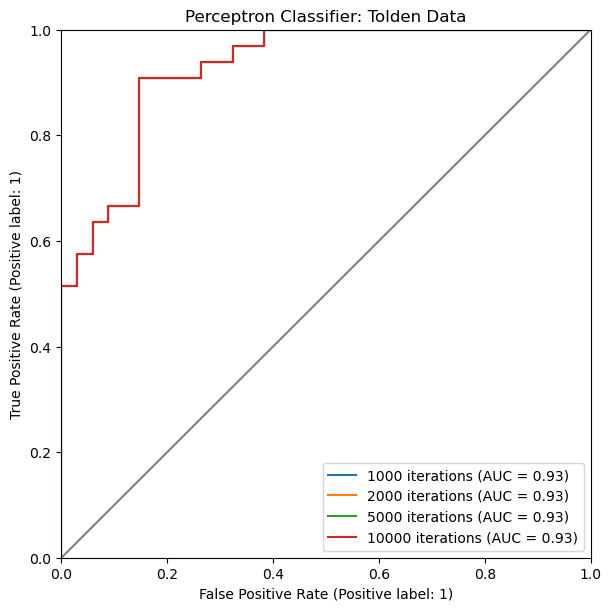

In [33]:
fig,ax = plt.subplots(1,1,constrained_layout = True)
fig.set_size_inches((6,6))

classifiers = {}

for n in [10, 20, 50, 100]:

    per = Perceptron(max_iter=n*100, random_state=666)
    per.fit(high_var_X_train, y_train)

    y_pred = per.decision_function(high_var_X_test)

    display = RocCurveDisplay.from_predictions(
        y_test,
        y_pred,
        name='{n} iterations'.format(n=n*100),
        ax=ax
    )
    
    classifiers[n] = per

ax.set_xlim((0,1))
ax.set_ylim((0,1))

ax.plot([0,1],[0,1], color = 'grey')

ax.set_title('Perceptron Classifier: Tolden Data')

plt.show()

In [34]:
silver_data = pd.read_csv('cleaned_silver_data_cpm_times10000.csv', index_col = 0)

#convert to cpm and restrict to chosen genes from previous dataset
silver_X = silver_data[[x for x in high_var_X_train.columns if '_RANK' not in x]]/10000
silver_y = silver_data[label_col]

#renormalize
silver_X = 1000000*(silver_X.T/silver_X.sum(axis = 1)).T

#add rank information
silver_X = silver_X.join(silver_X.rank(axis=1),rsuffix='_RANK')

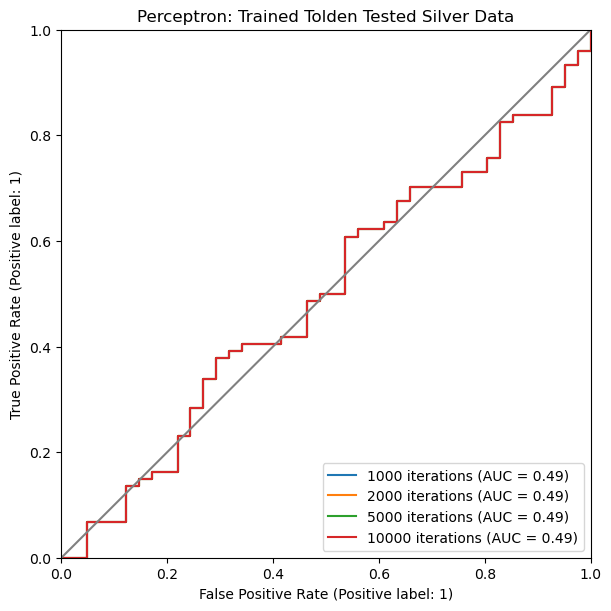

In [37]:
fig,ax = plt.subplots(1,1,constrained_layout = True)
fig.set_size_inches((6,6))

for n in classifiers:

    per = classifiers[n]

    y_pred = per.decision_function(silver_X)

    display = RocCurveDisplay.from_predictions(
        silver_y,
        y_pred,
        name='{n} iterations'.format(n=n*100),
        ax=ax
    )
    
    classifiers[n] = rfc

ax.set_xlim((0,1))
ax.set_ylim((0,1))

ax.plot([0,1],[0,1], color = 'grey')

ax.set_title('Perceptron: Trained Tolden Tested Silver Data')

plt.show()